# Building a curated database of published bisulfite sequencing data
**start date**: 1 Dec 2015

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
meta = pd.read_table('../data/2016-10-20.metadata.columbia.txt', header=0)

In [32]:
meta.shape

(1326, 99)

In [39]:
meta.columns

Index(['study_accession', 'submission_accession', 'sample_accession',
       'experiment_accession', 'run_accession', 'instrument_model',
       'library_strategy', 'library_layout', 'fastq_ftp', 'submitted_ftp',
       'BioSampleModel', 'ENA-BASE-COUNT', 'ENA-CHECKLIST', 'ENA-SPOT-COUNT',
       'ENA-SUBMISSION-TOOL', 'accession_x', 'accession name',
       'accession number', 'additional_description', 'age', 'alias',
       'antibody', 'background', 'background ecotype', 'biomaterial_provider',
       'bioproject_id', 'cell line', 'cell type', 'cell_type', 'collected_by',
       'collection_date', 'cultivar', 'description', 'dev_stage',
       'developemental stage', 'development stage', 'developmental stage',
       'dna source', 'duration of treatment', 'ecotype', 'ecotype background',
       'ecotype id', 'expression system', 'function', 'gene id',
       'genetic background', 'genetic backround', 'genotype',
       'genotype/variation', 'geo_loc_name',
       'geographic location

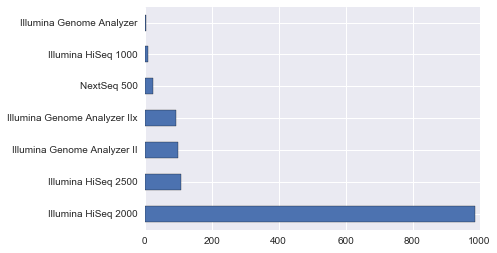

In [33]:
meta['instrument_model'].value_counts().plot(kind='barh')

## Curation

### Check publications where columbia and genotype info was missing

In [53]:
sum(~meta.has_columbia), sum(meta.genotype_missing)

(307, 370)

In [54]:
unknown = ~meta.has_columbia & meta.genotype_missing

In [64]:
meta[unknown]['study_accession'].unique()

array(['PRJDB2368', 'PRJDB2451', 'PRJDB3124', 'PRJDB3125', 'PRJEB2678',
       'PRJEB9919', 'PRJEB5331', 'PRJNA274767', 'PRJNA302602',
       'PRJNA30811', 'SRP008452', 'SRP010187', 'SRP008329', 'PRJNA169238',
       'PRJNA170183'], dtype=object)

In [55]:
meta[unknown]['submission_accession'].unique()

array(['DRA001060', 'DRA001061', 'DRA002545', 'DRA002548', 'DRA002549',
       'DRA002551', 'DRA002554', 'DRA002555', 'DRA003018', 'DRA003019',
       'DRA003020', 'ERA051872', 'ERA542527', 'ERA542528', 'ERA285193',
       'ERA459432', 'SRA236704', 'SRA312115', 'SRA035939', 'SRA046308',
       'SRA049100', 'SRA046092', 'SRA054962', 'SRA055363'], dtype=object)

Add columbia information based on literature search linked to SRA accession.

In [63]:
columns = ['submission_accession', 'pubmed_id', 'ecotype_literature']

In [61]:
submissions = list()

submissions.append(('DRA001060', '23900287', 'Col-0/Col-0'))
submissions.append(('DRA001061', '23900287', 'Col-0/Col-0'))
submissions.append(('DRA002545', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA002548', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA002549', '25902052', 'Col-0/Col-0'))

submissions.append(('DRA002551', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA002554', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA002555', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA003018', '25902052', 'Col-0/Col-0'))
submissions.append(('DRA003019', '25902052', 'Col-0/Col-0'))

submissions.append(('DRA003020', '25902052', 'Col-0/Col-0'))
submissions.append(('ERA051872', '22057020', 'Col-0/Col-0'))
submissions.append(('ERA542527', '27001853', 'Col-0/Col-0'))
submissions.append(('ERA542528', '27001853', 'Col-0/Col-0'))
submissions.append(('ERA285193', '25569172', 'mixed'))

submissions.append(('ERA459432', '27001853', 'Col-0/Col-0'))
submissions.append(('SRA236704', '25939354', 'T550/Brösarp-11-135'))
submissions.append(('SRA312115', '27457936', 'Col-0/Col-0'))

    

In [62]:
pd.DataFrame(submissions, columns=columns)

submission_accession pubmed_id ecotype_found
0            DRA001060  23900287           Col
1            DRA001061  23900287           Col

## Curation of columns

Drop boolean columns that have been used for filtering and float columns, which includes those without data (NaN).

In [91]:
meta_curated = meta.select_dtypes(exclude=['bool', 'float'])

Generate a series for the number of unique entries and check for column usefulness

In [101]:
columns = set(meta_curated.columns)

In [115]:
# previously found useful columns
useful_columns = list()

useful_columns.append('accession')
useful_columns.append('accession name')
useful_columns.append('age')
useful_columns.append('alias')
useful_columns.append('background')
useful_columns.append('background ecotype')
useful_columns.append('cell type')
useful_columns.append('cell_type')
useful_columns.append('cultivar')
useful_columns.append('description')
useful_columns.append('dev_stage')
useful_columns.append('development stage')
useful_columns.append('developmental stage')
useful_columns.append('dna source')
useful_columns.append('ecotype')
useful_columns.append('ecotype background')
useful_columns.append('genetic background')
useful_columns.append('genetic backround')
useful_columns.append('genotype')
useful_columns.append('genotype/variation')
useful_columns.append('geo_loc_name')
useful_columns.append('geographic location (country and/or sea)')
useful_columns.append('growth temperature')
useful_columns.append('isolate')
useful_columns.append('light cycle')
useful_columns.append('line')
useful_columns.append('misc_param')
useful_columns.append('molecule subtype')
useful_columns.append('organism part')
useful_columns.append('sample_name')
useful_columns.append('sample type')
useful_columns.append('sample_type')
useful_columns.append('sample comment')
useful_columns.append('source_name')
useful_columns.append('strain')
useful_columns.append('strain/background')
useful_columns.append('strain/ecotype background')
useful_columns.append('tissue')
useful_columns.append('tissue_type')
useful_columns.append('title_x')
useful_columns.append('title_y')
useful_columns.append('treatment')

Check the columns that have not been included previously for usefulness

In [116]:
columns - set(useful_columns)

{'BioSampleModel',
 'ENA-CHECKLIST',
 'ENA-SUBMISSION-TOOL',
 'accession_x',
 'additional_description',
 'biomaterial_provider',
 'bioproject_id',
 'developemental stage',
 'duration of treatment',
 'experiment_accession',
 'expression system',
 'fastq_ftp',
 'function',
 'gene id',
 'instrument_model',
 'label',
 'library_layout',
 'library_strategy',
 'organism',
 'oxy_stat_samp',
 'parent 1',
 'parent 2',
 'protein',
 'protein affinity tag',
 'protein family',
 'protein source',
 'replicate',
 'run_accession',
 'sample_accession',
 'sample_title',
 'secondary_sample_accession',
 'sex',
 'study_accession',
 'submitted_ftp',
 'subset',
 'time'}

In [167]:
meta_curated['time'].dropna().value_counts()

August      2
February    2
Name: time, dtype: int64

In [114]:
useful_columns + ['additional_description',
                  'developemental stage',
                  'duration of treatment',
                  'experiment_accession',
                  'fastq_ftp',
                  'label',
                  'library_layout',
                  'run_accession',
                  'secondary_sample_accession',
                  'study_accession',
                  'submitted_ftp']                  

Make a list of unique entries

In [84]:
unique_entries = meta_curated.apply(lambda col: len(col.dropna().unique())).sort_values()

In [182]:
meta[meta["parent 2"] == 'Brosarp-11-135'].select_dtypes(include=['bool'])['genotype_missing'].unique()

array([True], dtype=object)

In [130]:
a

[1, 2, 3, ['a', 'b']]

### Useful columns

We generate a Series that gives the number of missing data for each column and initialize the list of useful columns with those fields that have no missing data. In the following, we exclude the boolean columns that are in the metadata table only for doing (and checking) the filtering.

In [26]:
column_nan = (meta.select_dtypes(exclude=['bool'])
                  .isnull().sum()
                  .sort_values())

In [27]:
useful_columns = list(column_nan[column_nan == 0].index)
useful_columns

['study_accession',
 'library_layout',
 'library_strategy',
 'instrument_model',
 'title_y',
 'experiment_accession',
 'secondary_sample_accession',
 'sample_accession',
 'run_accession']

Now we want to check the most well-represented columns first.

In [73]:
from itertools import chain
l = chain.from_iterable(meta['title_y'].str.split(';'))

In [36]:
import json

with open("../data/aggregated_columns.json", "r") as handle:
    agg = json.load(handle)
    
agg

{'DNA source': ['age',
  'cell type',
  'cell_type',
  'dev_stage',
  'development stage',
  'developmental stage',
  'misc_param',
  'organism part',
  'tissue',
  'tissue_type'],
 'description': ['additional_description',
  'alias',
  'background',
  'description',
  'growth temperature',
  'light cycle',
  'molecule subtype',
  'sample comment',
  'sample_type',
  'sample type',
  'source_name',
  'title_x',
  'title_y',
  'treatment'],
 'genotype': ['accession name',
  'background ecotype',
  'cultivar',
  'dna source',
  'ecotype',
  'ecotype background',
  'genetic background',
  'genetic backround',
  'genotype',
  'genotype/variation',
  'isolate',
  'line',
  'strain',
  'strain/background',
  'strain/ecotype background'],
 'location': ['geo_loc_name', 'geographic location (country and/or sea)']}

In [62]:
meta[agg['DNA source']][meta['title_y'].str.contains('wt|wild-type', case=False)].fillna('')

age cell type cell_type dev_stage development stage  \
313      3 weeks                                                   
358   2-week old                                                   
362   2-week old                                                   
363   2-week old                                                   
364   2-week old                                                   
374                                                                
414      12 days                                                   
556                                                                
581                                                                
589                                                                
590                                                                
591                                                                
592                                                                
593                                                                
594                                                                
595                                                                
596                                                                
597                                                                
598                                                                
599                                                                
600                                                                
601                                                                
602                                                                
603                                                                
604                                                                
605                                                                
606                                                                
607                                                                
608                                                                
609                                                                
...          ...       ...       ...       ...               ...   
1029                                                               
1030                                                               
1033                                                               
1034                                                               
1037                                                               
1038                                                               
1041                                                               
1043        3 wk                                                   
1044        3 wk                                                   
1052     10 days                                                   
1056     10 days                                                   
1116                                                               
1160                                                               
1161                                                               
1162                                                               
1163                                                               
1165                                                               
1172                                                               
1188                                                               
1234                                                               
1274                                                               
1275                                                               
1276                                                               
1287                                                               
1288                                                               
1289                                                               
1290                                                               
1

In [59]:
meta.iloc[1148]['additional_description']

'Immature flower buds from adult (~5 week old) nrpe1-11 Arabidopsis thaliana plants grown under long day conditions'

In [94]:
import pandas as pd

def categorical_variables(dframe):
    variables = list(set(dframe.columns) - set(dframe._get_numeric_data().columns))
    variables.sort(key=str.lower)
    return variables

def levels(dframe, variables):
    for var in variables:
        yield dframe[var].value_counts()

In [95]:
lev = levels(meta, categorical_variables(meta))

Evaluate next cell until iteration stops, if column has useful info, add to useful_columns

In [98]:
next(lev)

A.thaliana BS-Seq data of mutation accumulation lines, leaf tissue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [102]:
useful_columns = list()

useful_columns.append('accession')
useful_columns.append('accession name')
useful_columns.append('age')
useful_columns.append('alias')
useful_columns.append('background')
useful_columns.append('background ecotype')
useful_columns.append('cell type')
useful_columns.append('cell_type')
useful_columns.append('cultivar')
useful_columns.append('description')
useful_columns.append('dev_stage')
useful_columns.append('development stage')
useful_columns.append('developmental stage')
useful_columns.append('dna source')
useful_columns.append('ecotype')
useful_columns.append('ecotype background')
useful_columns.append('genetic background')
useful_columns.append('genetic backround')
useful_columns.append('genotype')
useful_columns.append('genotype/variation')
useful_columns.append('geo_loc_name')
useful_columns.append('geographic location (country and/or sea)')
useful_columns.append('growth temperature')
useful_columns.append('isolate')
useful_columns.append('light cycle')
useful_columns.append('line')
useful_columns.append('misc_param')
useful_columns.append('molecule subtype')
useful_columns.append('organism part')
useful_columns.append('sample_name')
useful_columns.append('sample type')
useful_columns.append('sample_type')
useful_columns.append('sample comment')
useful_columns.append('source_name')
useful_columns.append('strain')
useful_columns.append('strain/background')
useful_columns.append('strain/ecotype background')
useful_columns.append('tissue')
useful_columns.append('tissue_type')
useful_columns.append('title_x')
useful_columns.append('title_y')
useful_columns.append('treatment')

In [6]:
meta_useful = meta[useful_columns]

In [125]:
lev = levels(meta_useful, categorical_variables(meta_useful))

NameError: name 'meta_filtered' is not defined

Evaluate next cell until iteration stops, if columns can be aggregated do so

In [8]:
next(lev)

SRS827800     1
SRS1146921    1
SRS394683     1
SRS541201     1
SRS400824     1
SRS1166783    1
SRS348309     1
SRS1146399    1
SRS353457     1
SRS813710     1
SRS1146556    1
SRS1146586    1
SRS1146808    1
SRS1146746    1
SRS1146978    1
SRS1146384    1
SRS1146976    1
SRS1147233    1
SRS1146744    1
SRS353488     1
SRS1146478    1
SRS827182     1
SRS1147207    1
SRS466003     1
SRS541152     1
SRS353439     1
SRS1146798    1
SRS1147078    1
SRS882288     1
SRS1028980    1
             ..
SRS1111574    1
DRS019632     1
SRS1147251    1
SRS541105     1
SRS1146960    1
SRS295637     1
SRS827804     1
SRS541266     1
SRS1146827    1
SRS400834     1
SRS473163     1
SRS003093     1
SRS1146494    1
SRS511014     1
SRS1146881    1
SRS1146620    1
SRS719227     1
SRS349539     1
SRS353480     1
SRS1146991    1
SRS1147157    1
SRS507072     1
DRS030794     1
SRS353498     1
SRS1147117    1
SRS827792     1
SRS507073     1
SRS1146415    1
SRS1146335    1
SRS1147006    1
Name: accession, dtype: 

In [54]:
aggregate_column = dict()

aggregate_column['genotype'] = []
aggregate_column['genotype'].append('accession name')
aggregate_column['genotype'].append('background ecotype')
aggregate_column['genotype'].append('cultivar')
aggregate_column['genotype'].append('dna source')
aggregate_column['genotype'].append('ecotype')
aggregate_column['genotype'].append('ecotype background')
aggregate_column['genotype'].append('genetic background')
aggregate_column['genotype'].append('genetic backround')
aggregate_column['genotype'].append('genotype')
aggregate_column['genotype'].append('genotype/variation')
aggregate_column['genotype'].append('isolate')
aggregate_column['genotype'].append('line')
aggregate_column['genotype'].append('strain')
aggregate_column['genotype'].append('strain/background')
aggregate_column['genotype'].append('strain/ecotype background')

aggregate_column['description'] = []
aggregate_column['description'].append('additional_description')
aggregate_column['description'].append('alias')
aggregate_column['description'].append('background')
aggregate_column['description'].append('description')
aggregate_column['description'].append('growth temperature')
aggregate_column['description'].append('light cycle')
aggregate_column['description'].append('molecule subtype')
aggregate_column['description'].append('sample comment')
aggregate_column['description'].append('sample_type')
aggregate_column['description'].append('sample type')
aggregate_column['description'].append('source_name')
aggregate_column['description'].append('title_x')
aggregate_column['description'].append('title_y')
aggregate_column['description'].append('treatment')

aggregate_column['DNA source'] = []
aggregate_column['DNA source'].append('age')
aggregate_column['DNA source'].append('cell type')
aggregate_column['DNA source'].append('cell_type')
aggregate_column['DNA source'].append('dev_stage')
aggregate_column['DNA source'].append('development stage')
aggregate_column['DNA source'].append('developmental stage')
aggregate_column['DNA source'].append('misc_param')
aggregate_column['DNA source'].append('organism part')
aggregate_column['DNA source'].append('tissue')
aggregate_column['DNA source'].append('tissue_type')

aggregate_column['location'] = []
aggregate_column['location'].append('geo_loc_name')
aggregate_column['location'].append('geographic location (country and/or sea)')

In [64]:
with open("../data/aggregated_columns.json", "w") as json_:
    json_.write(json.dumps(aggregate_column, indent=4, sort_keys=True))

### Print metadata for Marc

In [127]:
meta = pd.read_table("../data/meta_ena_filtered.txt", header=0)

In [135]:
# check the columns relevant for merging
from itertools import compress

mask = [0 if c.find('accession') == -1 else 1 for c in meta.columns]
cols = list(compress(meta.columns, mask))
meta[categorical_variables(meta[cols])].columns

Index(['accession name', 'experiment_accession', 'run_accession',
       'sample_accession', 'secondary_sample_accession', 'study_accession'],
      dtype='object')

In [147]:
colbsseq = meta[['study_accession', 'sample_accession','secondary_sample_accession', 'experiment_accession', 'run_accession', 'library_layout', 'instrument_model', 'fastq_ftp', 'submitted_ftp']]

In [148]:
colbsseq.to_csv("../data/col_bs.txt", sep='\t', encoding='utf-8', index=False)

In [145]:
colbsseq.instrument_model.value_counts()

Illumina HiSeq 2000             988
Illumina HiSeq 2500             108
Illumina Genome Analyzer II      99
Illumina Genome Analyzer IIx     94
NextSeq 500                      19
Illumina HiSeq 1000               9
Illumina Genome Analyzer          4
Name: instrument_model, dtype: int64

In [284]:
meta_new = pd.DataFrame()
for key, value in aggregate_column.items():
    meta_new[key] = meta_colbs[value].apply(lambda x: x.str.cat(sep='|'), axis=1)

In [321]:
cols = ['accession_x', 'accession_y', 'run_accession', 'library_strategy', 'library_layout', 'fastq_ftp', 'submitted_ftp']

meta_colbs_new = pd.concat([meta_new, meta_colbs[cols]], axis=1)

meta_colbs_new = meta_colbs_new.rename(columns={'accession_x':'sample_accession', 'accession_y':'experiment_accession'})

pattern = "ler|landsberg|c24|cvi"

meta_colbs_new = meta_colbs_new[~meta_colbs_new.genotype.str.lower().str.contains(pattern)]

In [2]:
meta_colbs_new.to_csv('../data/col_bs.txt', sep='\t', encoding='utf-8', index=False)

NameError: name 'meta_colbs_new' is not defined

In [5]:
meta_colbs_new = pd.read_table("../data/col_bs.txt")

In [8]:
meta_colbs_new.head()

study_accession sample_accession secondary_sample_accession  \
0       PRJDB2206     SAMD00009310                  DRS000723   
1       PRJDB2206     SAMD00009310                  DRS000723   
2       PRJDB2368     SAMD00010738                  DRS011876   
3       PRJDB2451     SAMD00011659                  DRS011877   
4       PRJDB2937     SAMD00018416                  DRS030794   

  experiment_accession run_accession library_layout  \
0            DRX000762     DRR001165         SINGLE   
1            DRX000763     DRR001166         SINGLE   
2            DRX012009     DRR013119         PAIRED   
3            DRX012010     DRR013120         PAIRED   
4            DRX019490     DRR021337         PAIRED   

               instrument_model  \
0  Illumina Genome Analyzer IIx   
1  Illumina Genome Analyzer IIx   
2           Illumina HiSeq 2000   
3           Illumina HiSeq 2000   
4           Illumina HiSeq 2000   

                                           fastq_ftp submitted_ftp  
0  ftp.sra.ebi.ac.uk/vol1/fastq/DRR001/DRR001165/...           NaN  
1  ftp.sra.ebi.ac.uk/vol1/fastq/DRR001/DRR001166/...           NaN  
2  ftp.sra.ebi.ac.uk/vol1/fastq/DRR013/DRR013119/...           NaN  
3  ftp.sra.ebi.ac.uk/vol1/fastq/DRR013/DRR013120/...           NaN  
4  ftp.sra.ebi.ac.uk/vol1/fastq/DRR021/DRR021337/...           NaN

In [20]:
meta_colbs_new.sample_accession.value_counts() #.plot(kind='barh')

SAMN03765231    96
SAMN03765232    96
SAMN03765234    96
SAMN03765233    96
SAMEA1094186    30
SAMN02640060    13
SAMN00990497     9
SAMN01055098     8
SAMN01055038     7
SAMD00025289     6
SAMD00025296     6
SAMD00025294     6
SAMD00025290     6
SAMD00025292     6
SAMN01057643     6
SAMD00025295     6
SAMD00025293     6
SAMD00025291     6
SAMN00990694     6
SAMN02934673     6
SAMEA3484757     6
SAMN01057645     6
SAMN01057644     6
SAMN00002559     5
SAMN00002558     5
SAMN01057642     5
SAMN00002557     5
SAMEA3484762     4
SAMN01974825     4
SAMEA3484755     4
                ..
SAMN03444885     1
SAMN01103747     1
SAMN04217993     1
SAMN01103788     1
SAMN03332395     1
SAMN03332388     1
SAMN02485752     1
SAMN02799579     1
SAMN01103762     1
SAMN02485754     1
SAMN03272743     1
SAMN02640768     1
SAMN03332392     1
SAMN03332333     1
SAMN03332324     1
SAMN03444889     1
SAMD00020226     1
SAMN01103769     1
SAMN04857156     1
SAMN01103763     1
SAMN01085215     1
SAMN01974831

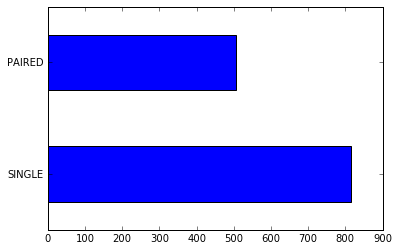

In [11]:
meta_colbs_new.library_layout.value_counts().plot(kind='barh')

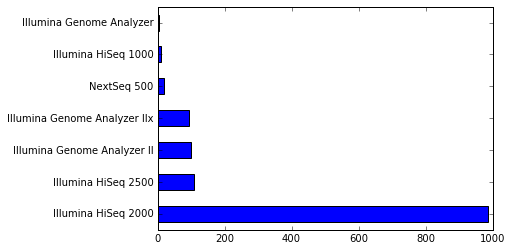

In [12]:
meta_colbs_new.instrument_model.value_counts().plot(kind='barh')

In [325]:
meta_colbs_new.genotype.value_counts()

                                                                                                       380
Columbia|hda6-6                                                                                        192
Columbia|Wild type                                                                                     103
Columbia-0                                                                                             102
Columbia|hda6-7                                                                                         96
Col-0                                                                                                   44
Columbia|wild type                                                                                      21
Col-0|Col-0                                                                                             19
Col 0 (CS70000)                                                                                         16
Columbia-0|wild type                 

## Curation of biosamples metadata

In [3]:
import pandas as pd
import numpy as np

In [4]:
samples = pd.read_csv('../data/metadata_from_biosample.txt', header=0, sep='\t')
metacol = pd.read_csv('../data/2016-10-20.metadata.columbia.txt', header=0, sep='\t')

In [5]:
samples.shape, metacol.shape

((653, 59), (1326, 100))

In [6]:
len(metacol.biosample_id.unique()) == len(samples)

True

In [7]:
res_shape = dict()
res = pd.merge(metacol, samples, on='biosample_id', how='left', suffixes=('', '_r'))
res_shape['before'] = res.shape
# remove studies with other ecotypes than columbia that slipped through
res = res[res['study_accession'] != 'PRJEB5331']
res = res[~(res['parent 1'] == 'T550')]
# remove noncategorical columns (bool, float)
res = res.select_dtypes(exclude=['bool', 'float'])
# remove duplicate columnns
res = res.apply(lambda x: x.str.lower()).T.drop_duplicates().T
# remove remaining empty columns
res = res[res.columns[res.isnull().all(axis=0) == False]]
res_shape['after'] = res.shape

In [8]:
res_shape

{'after': (1187, 93), 'before': (1326, 158)}

In [9]:
def merge(y):
    x = y.dropna()
    if x.any():
        if len(set(x)) == 1:
            return x[0]
        else:
            return '||'.join(x)
    else:
        return np.nan

merge and write useful columns to file

In [10]:
unused_columns = set()

unused_columns.add('BioSampleModel')
unused_columns.add('ENA ALIAS')
unused_columns.add('ENA-CHECKLIST')
unused_columns.add('ENA-SUBMISSION-TOOL')
unused_columns.add('GEO Accession')
unused_columns.add('accession_x')
unused_columns.add('biomaterial_provider')
unused_columns.add('bioproject_id')
unused_columns.add('chemical compound')
unused_columns.add('experimental factor 1')
unused_columns.add('experimental factor 2')
unused_columns.add('experimental factor 3')
unused_columns.add('experimental factor 4')
unused_columns.add('expression system')
unused_columns.add('fastq_ftp')
unused_columns.add('function')
unused_columns.add('gene id')
unused_columns.add('geo_loc_name')
unused_columns.add('immunoprecipitate')
unused_columns.add('initial time point')
unused_columns.add('instrument_model')
unused_columns.add('isolate')
unused_columns.add('library_layout')
unused_columns.add('library_strategy')
unused_columns.add('molecule subtype')
unused_columns.add('organism')
unused_columns.add('oxy_stat_samp')
unused_columns.add('protein')
unused_columns.add('protein affinity tag')
unused_columns.add('protein family')
unused_columns.add('protein source')
unused_columns.add('protocol')
unused_columns.add('recurated from')
unused_columns.add('replicate')
unused_columns.add('sample_accession')
unused_columns.add('sample_type')
unused_columns.add('sex')
unused_columns.add('submission_accession')
unused_columns.add('submitted_ftp')
unused_columns.add('subset')
unused_columns.add('time')

useful_columns = list(set(res.columns) - unused_columns)

In [448]:
(res[useful_columns]
 .apply(merge, axis=1)
 .to_csv('../data/metadata_to_handcurate.txt', header=False, index=False))

### Merge curated metadata with runs sent to Marc and add submitter

* 22 Nov 2016

In [7]:
cd ..

/home/oender/CloudStation/projects/meta-methylome


In [8]:
import pandas as pd
from scripts.fetchdb import ena_submitter

In [15]:
meta = pd.read_csv('data/curated/metadata_handcurated.csv', header=0, comment='#')
runs_marc = pd.read_table('data/curated/2016-09-15.metadata.columbia.txt', header=0)

In [18]:
data = meta.merge(runs_marc, left_on='label', right_on='run_accession')

In [19]:
submitter = pd.DataFrame.from_records(ena_submitter(data.study.unique()), columns=['study', 'study_origin'])

In [20]:
submitter.head()

study                                       study_origin
0  PRJDB2206  Ito Laboratory, Department of Biophysics and B...
1  PRJDB2368  Division of Agricultural Genetics, Department ...
2  PRJDB2451  Division of Agricultural Genetics, Department ...
3  PRJDB2937        Okinawa Institute of Science and Technology
4  PRJDB3124  Division of Agricultural Genetics, Department ...

In [21]:
data_sub = data.merge(submitter, on='study')

In [23]:
data_sub.columns

Index(['label', 'experiment', 'biosample', 'study', 'ecotype', 'genotype',
       'genome_source', 'development stage', 'photoperiod', 'lineage',
       'treatment', 'study_accession', 'sample_accession',
       'secondary_sample_accession', 'experiment_accession', 'run_accession',
       'library_layout', 'instrument_model', 'fastq_ftp', 'submitted_ftp',
       'study_origin'],
      dtype='object')

In [30]:
cols = set(meta.columns)
cols.add('study_origin')

In [37]:
data_sub[list(cols)].to_csv('data/curated/metadata_handcurated_marc.csv', index=False, header=True)

## Metadata for Marc overview for paper

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/oender/anaconda/envs/meta-meth/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [33]:
m = pd.read_csv("../data/curated/metadata_handcurated_marc.csv", dtype='category')

In [34]:
m.columns

Index(['treatment', 'biosample', 'genotype', 'photoperiod', 'study_origin',
       'development stage', 'lineage', 'study', 'genome_source', 'ecotype',
       'experiment', 'label'],
      dtype='object')

In [51]:
m['genotype class'] = m.genotype.mask(m.genotype.str.lower() != 'wt', 'mutant')

In [61]:
m.rename(index=str, columns={'genome_source': 'genome source'}, inplace=True)

In [67]:
m.describe()

treatment     biosample genotype photoperiod  \
count            103          1181     1160         244   
unique            20           521      177           3   
top     NaCl control  SAMN03765232       wt      LD16:8   
freq              14            96      501         199   

                                 study_origin development stage lineage  \
count                                    1181               951     219   
unique                                     44                19      19   
top     University of California, Los Angeles            week 3      P0   
freq                                      484               565      47   

              study genome source ecotype  experiment      label  \
count          1181          1176    1179        1181       1181   
unique           78            17       2         667       1181   
top     PRJNA172021  rosette leaf   Col-0  SRX1053787  SRR988548   
freq            473           868    1172          96          1   

       genotype class  
count            1181  
unique              2  
top            mutant  
freq              680

/Users/oender/anaconda/envs/meta-meth/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


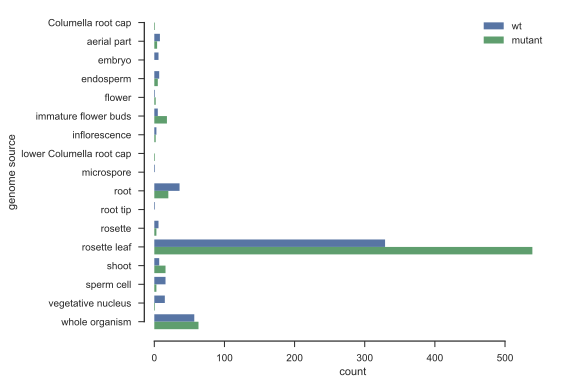

In [79]:
sns.set_style("white")
sns.set_context("paper")
sns.set(style="ticks")

fig_label = 'fig1_a.metadata'
fig_format = '.svg'
fig_wscale = 1
fig_caption = r'''
    '''

output = '../paper/' + fig_label + fig_format

fig = plt.figure()
ax = fig.add_subplot(111)

sns.countplot(y="genome source", hue="genotype class", data=m)

ax.legend(loc='upper right')
sns.despine(offset=10, trim=True)
fig.set_tight_layout(True)
fig.savefig(output)

In [80]:
plt.close('all')

In [84]:
m_roswt = m[(m['genome source']=='rosette leaf') & (m['genotype class']=='wt')]

In [87]:
m_roswt.describe()

treatment     biosample genotype photoperiod  \
count             46           329      329         130   
unique             7           109        1           3   
top     NaCl control  SAMN03765231       wt      LD16:8   
freq               8            96      329          96   

                                             study_origin development stage  \
count                                                 329               262   
unique                                                 13                 9   
top     Max Planck Institute for Developmental Biology...            week 3   
freq                                                  108               131   

          lineage        study genome source ecotype  experiment      label  \
count         124          329           329     329         329        329   
unique         13           25             1       1         222        329   
top     wt (x) wt  PRJNA172021  rosette leaf   Col-0  SRX1053784  ERR964658   
freq           34           98           329     329          96          1   

       genotype class  
count             329  
unique              1  
top                wt  
freq              329

In [96]:
for i, lab in enumerate(m_roswt['lineage'].unique()):
    print(i+1, lab)

1 ddm1/+ (x) ddm1/+
2 wt (x) wt
3 nan
4 P1 25 mM NaCl
5 P1 75 mM NaCl
6 P1 control
7 P2 25 mM NaCl
8 P2 75 mM NaCl
9 P2 control
10 P1 25mm NaCl
11 P1 75mm NaCl
12 P2 25mm NaCl
13 P2 75mm NaCl
14 P0


In [97]:
m_rootwt = m[(m['genome source']=='root') & (m['genotype class']=='wt')]

In [98]:
m_rootwt.describe()

treatment     biosample genotype  photoperiod  \
count                          11            36       36          0.0   
unique                          4            15        1          0.0   
top     13 mM NaH2PO4 for 10 days  SAMN02640060       wt          NaN   
freq                            3            13       36          NaN   

       study_origin development stage  lineage        study genome source  \
count            36                15      0.0           36            36   
unique            4                 3      0.0            4             1   
top            UCLA          seedling      NaN  PRJNA237956          root   
freq             17                 9      NaN           17            36   

       ecotype experiment       label genotype class  
count       36         36          36             36  
unique       1         17          36              1  
top      Col-0  SRX469414  SRR1167713             wt  
freq        36         13           1             36